<a href="https://colab.research.google.com/github/japnit01/Handwritten_digits/blob/main/Handwritten_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import keras

In [64]:
#importing libraries
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [65]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

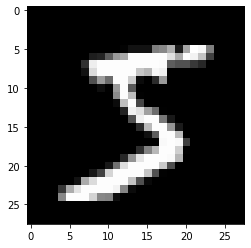

5


In [66]:
#viewing the sample
plt.imshow(x_train[0], cmap="gray")
plt.show()
print (y_train[0])

In [67]:
print(format(x_train.shape))
print(format(x_test.shape))
print(format(y_train.shape))
print(format(y_test.shape))

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [68]:
#reshaping the images for our model
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [69]:
print(format(x_train.shape))
print(format(x_test.shape))
print(format(y_train.shape))
print(format(y_test.shape))

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


In [70]:
#one hot encoding the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [71]:
print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


1) The first layer takes in an input shape, 28, 28, 1 where 1 is greyscale.
2) The second layer there is flatten layer b/w the Conv2D layers and the dense layer. Flatten serves as a connection between convolutional and dense layer
3) taking 10 nodes in our output layer, one for each poss outcome (0-9)
4) Softmax makes the output sum up to 1, so that the output contains a series of probabilities.

In [72]:
model = Sequential()

#making layers 
model.add(Conv2D(64,(3,3), activation='relu', input_shape =(28,28,1)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

Compiling the model

1)Optimizer - It controls the learning rate.
2)Loss function - 'categorical_crossentropy' loss function. A lower score corresponds to better performance.
3)Metric - metric is set to accuracy to see the accuracy score on the validation set while training the model.

In [73]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 171s 91ms/step - loss: 0.2054 - accuracy: 0.9518 - val_loss: 0.0722 - val_accuracy: 0.9771
Epoch 2/3
1875/1875 [==============================] - 171s 91ms/step - loss: 0.0635 - accuracy: 0.9808 - val_loss: 0.0688 - val_accuracy: 0.9792
Epoch 3/3
1875/1875 [==============================] - 171s 91ms/step - loss: 0.0428 - accuracy: 0.9870 - val_loss: 0.0727 - val_accuracy: 0.9807


In [83]:
test_image = x_train[1]
prediction = model.predict(test_image.reshape(1, 28, 28, 1))
print(prediction)

[[1.0000000e+00 4.5232478e-14 2.2300630e-09 8.1110432e-17 1.3129882e-13
  2.9705232e-14 1.2453776e-11 4.9986800e-13 5.3707208e-14 5.6578326e-13]]


In [76]:
pred_arr = np.zeros(prediction.shape)
pred_arr[0][np.argmax(prediction)] =1
print(pred_arr)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


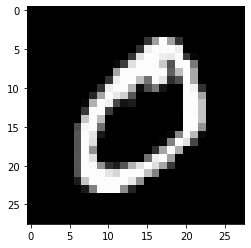

In [77]:
plt.imshow(test_image.reshape(28,28),cmap="gray")
plt.show()

In [78]:
print(np.argmax(prediction))

0


1) Convert that image to greyscale
2) Threshold command helps by making only the digits in the image are white and rest is black
3) contours will provide us the individual digits in the image
4) the image has to be of shape (28, 28), it should contain the digit white coloured and background black coloured
5) we'll resize it to (18,18)

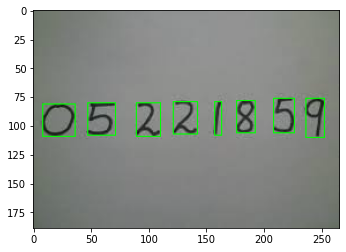

In [79]:
import cv2 
img = cv2.imread('/testit.jpg')
img1 = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(img1.copy(), 90, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

arr_digits = []

for c in contours:
    x,y,l,b = cv2.boundingRect(c)
    plt.imshow(cv2.rectangle(img, (x,y), (x+l, y+b), color=(0, 255, 0), thickness=1)) 
    digit = thresh[y:y+b, x:x+l]
    resized_digit = cv2.resize(digit, (18,18))
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    arr_digits.append(padded_digit)
    #print(preprocessed_digits)
#plt.imshow(image, cmap="gray")
#plt.show()

In [80]:
inp = np.array(arr_digits)

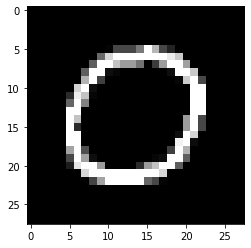

0
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


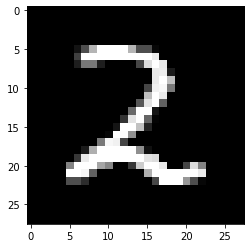

2
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


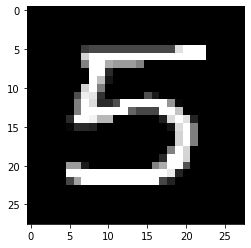

5
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


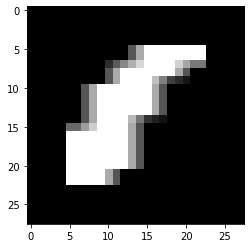

8
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


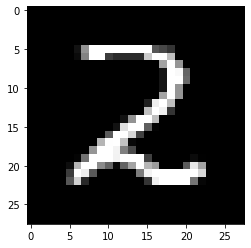

2
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


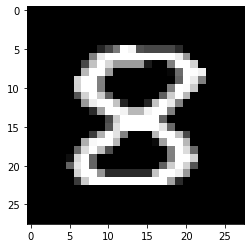

8
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


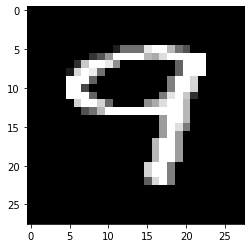

9
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


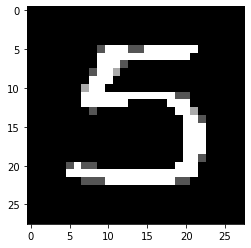

5
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [81]:
for i in arr_digits :
     prediction = model.predict(i.reshape(1,28,28,1))
     plt.imshow(i.reshape(28,28),cmap="gray")
     plt.show()
     print(np.argmax(prediction))
     pred_arr = np.zeros(prediction.shape)
     pred_arr[0][np.argmax(prediction)] =1
     print(pred_arr)

In [82]:
model.save('/content/drive/My Drive/Projects/digit.h5')